In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)


In [2]:
df=pd.read_csv("pima-indians-diabetes .csv")

In [3]:



df.head(5)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df=df.set_axis(["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Class"],axis=1)

In [6]:
features = df.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

In [7]:

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


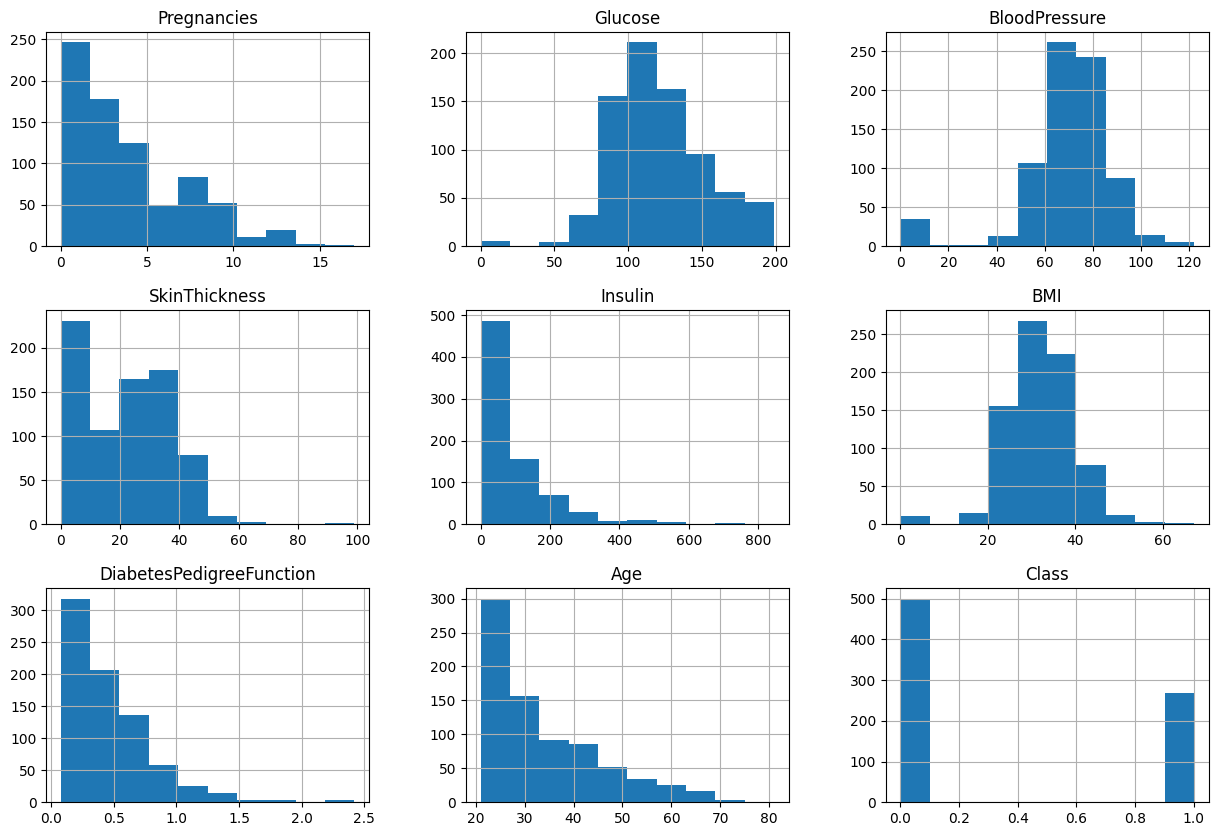

In [8]:

df.hist(figsize=(15,10))
plt.show()

In [10]:
#Since we have 0 values in the data we are using below feature engineering step tp replace the values

features_with_0 = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for feature in features_with_0:
 df[feature] = df[feature].replace(0,df[feature].median())

 #we have used median instead of mean to fill 0 values, mean is givning more percentage of outliers compared to median.

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

<Axes: >

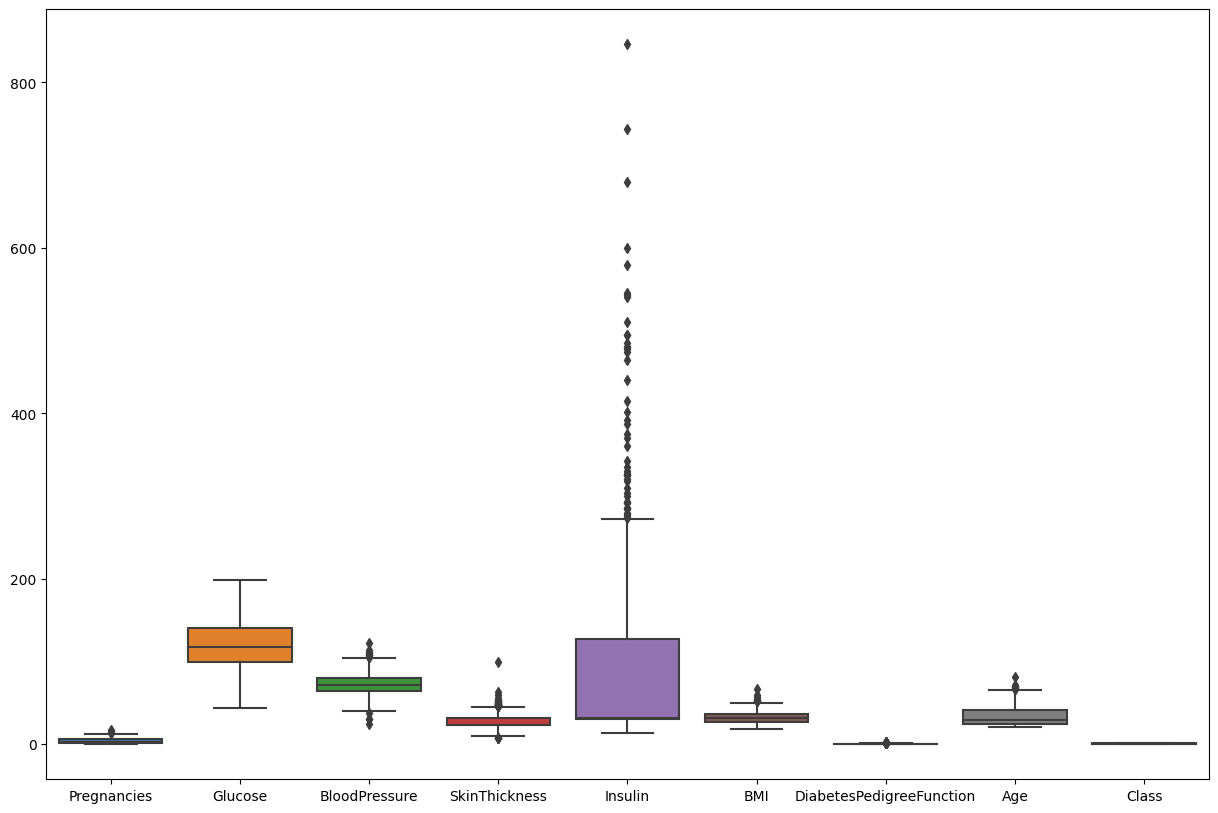

In [13]:

plt.figure(figsize=(15,10))
sns.boxplot(df)

In [14]:
#checking the count and percentage of outliers
for feature in features:
  outliers_count=0
  q1 = df[feature].describe()[4]
  q3 = df[feature].describe()[6]
  IQR = q3 - q1
  Lower_region = q1 - (1.5*IQR)
  Higher_region = q3 + (1.5*IQR)
  outliers_count = len(df[df[feature] < Lower_region]) + len(df[df[feature] > Higher_region])
  if(outliers_count==0):
    continue
  outliers_percentage = (outliers_count*100)/len(df[feature])
  print(f"{feature} : Lower_range =  {np.round(Lower_region,2)} , Higher_range =  {np.round(Higher_region,2)}")
  print(f"{feature} has {outliers_count} outliers and has {np.round(outliers_percentage,2)}% of outliers")

  print("---------------------------------------")

Pregnancies : Lower_range =  -6.5 , Higher_range =  13.5
Pregnancies has 4 outliers and has 0.52% of outliers
---------------------------------------
BloodPressure : Lower_range =  40.0 , Higher_range =  104.0
BloodPressure has 14 outliers and has 1.82% of outliers
---------------------------------------
SkinThickness : Lower_range =  9.5 , Higher_range =  45.5
SkinThickness has 35 outliers and has 4.56% of outliers
---------------------------------------
Insulin : Lower_range =  -114.62 , Higher_range =  272.38
Insulin has 49 outliers and has 6.38% of outliers
---------------------------------------
BMI : Lower_range =  13.85 , Higher_range =  50.25
BMI has 8 outliers and has 1.04% of outliers
---------------------------------------
DiabetesPedigreeFunction : Lower_range =  -0.33 , Higher_range =  1.2
DiabetesPedigreeFunction has 29 outliers and has 3.78% of outliers
---------------------------------------
Age : Lower_range =  -1.5 , Higher_range =  66.5
Age has 9 outliers and has 1.1


Test and Pedi has Highest number of outliers compared to other features

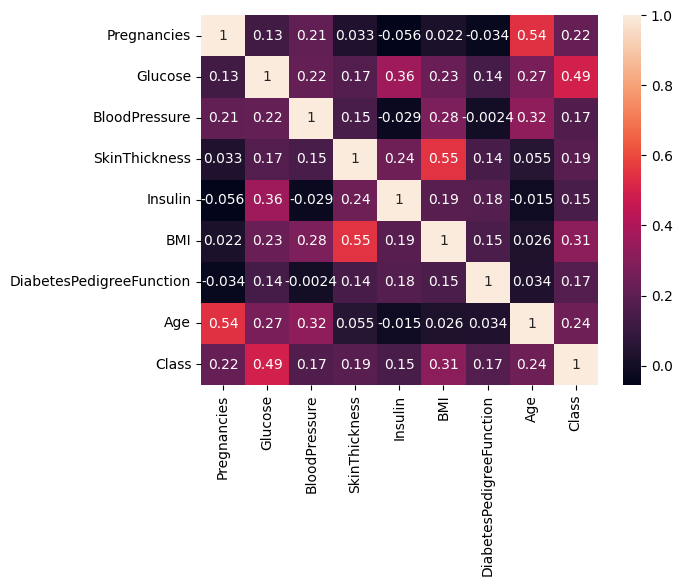

In [15]:

sns.heatmap(df.corr(),annot=True)
plt.show()

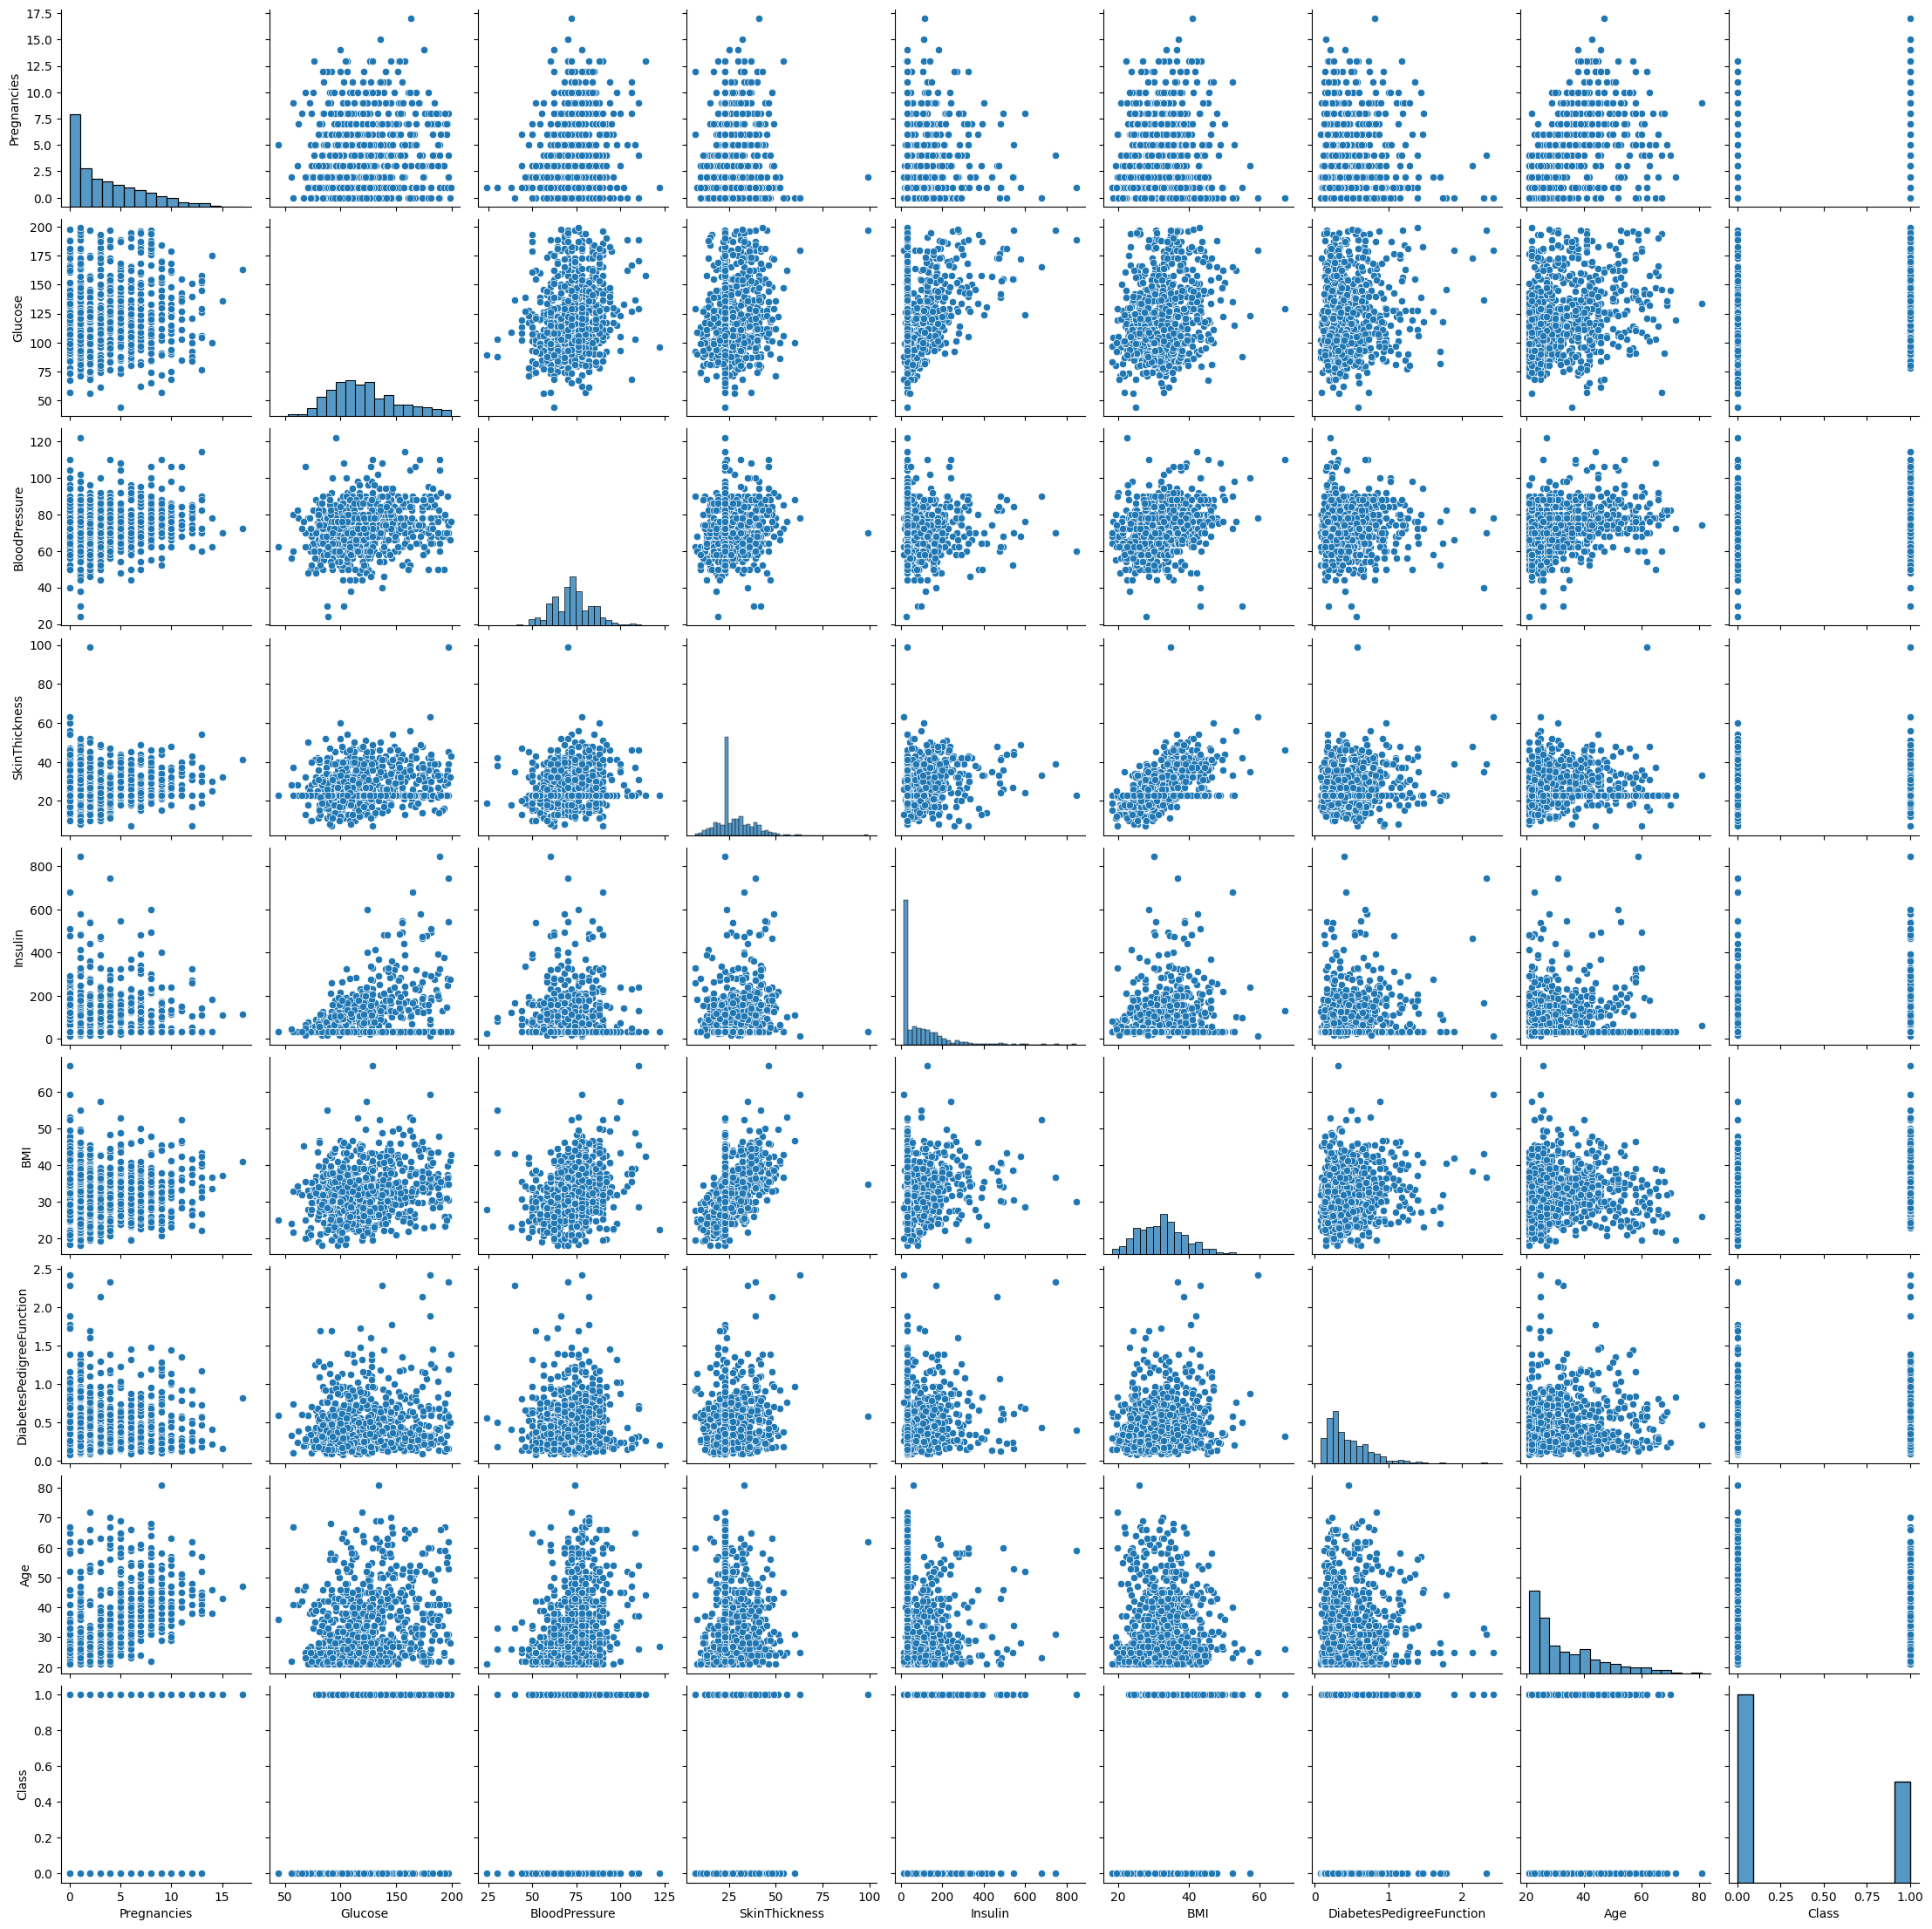

In [16]:
sns.pairplot(df)

In [17]:
X = df.drop("Class",axis=1)
y = df['Class']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [19]:



from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train,y_train)

LogisticRegression()

In [20]:
y_pred = regressor.predict(X_test)

In [21]:


y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [23]:
regressor.score(X_train,y_train)

0.7833876221498371

In [24]:
regressor.score(X_test,y_test)

0.7792207792207793

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7792207792207793